Except as notes, the code below was taken from the following blog, updated very, very slightly for a newer version of TensorFlow:

*   https://blog.tanka.la/2018/05/27/handwritten-digit-prediction-using-convolutional-neural-networks-in-tensorflow-with-keras-and-live-example-using-tensorflow-js/


Of particular note, it was updated to save and download models as shown here:

*   https://blog.tensorflow.org/2018/07/


In [1]:
import numpy
import matplotlib.pyplot as plt # Added for visualizations -GMK
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils


In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')

In [4]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

Look at an image before normalization, just to see:

This block based upon 
*   https://www.tensorflow.org/tutorials/keras/classification


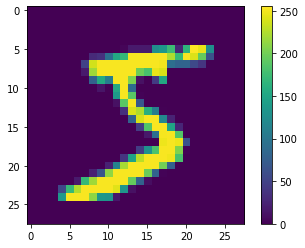

In [5]:
plt.figure()
plt.imshow(X_train[0][:,:,0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
# normalize inputs from 0-255 to 0-1
X_train/=255
X_test/=255

Look at an image after normalization, just to see:

This block based upon

https://www.tensorflow.org/tutorials/keras/classification

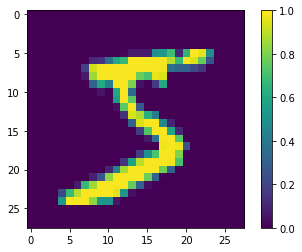

In [7]:
plt.figure()
plt.imshow(X_train[0][:,:,0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# one hot encode
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

In [10]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [11]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 37s 122ms/step - loss: 0.3032 - accuracy: 0.9114 - val_loss: 0.0677 - val_accuracy: 0.9796
Epoch 2/10
300/300 [==============================] - 36s 121ms/step - loss: 0.0798 - accuracy: 0.9754 - val_loss: 0.0462 - val_accuracy: 0.9843
Epoch 3/10
300/300 [==============================] - 36s 119ms/step - loss: 0.0573 - accuracy: 0.9821 - val_loss: 0.0394 - val_accuracy: 0.9873
Epoch 4/10
300/300 [==============================] - 36s 120ms/step - loss: 0.0472 - accuracy: 0.9858 - val_loss: 0.0308 - val_accuracy: 0.9906
Epoch 5/10
300/300 [==============================] - 36s 120ms/step - loss: 0.0391 - accuracy: 0.9881 - val_loss: 0.0298 - val_accuracy: 0.9896
Epoch 6/10
300/300 [==============================] - 36s 120ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0273 - val_accuracy: 0.9907
Epoch 7/10
300/300 [==============================] - 37s 122ms/step - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.0279 - val_ac

In [12]:
# Final evaluation of the model
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.023264290764927864, 0.9919000267982483]


In [13]:
# Save the model
model.save('handwriting.h5')

In [14]:
!pip install tensorflowjs 

     |████████████████████████████████| 71kB 3.5MB/s 
     |████████████████████████████████| 112kB 7.6MB/s 
  Found existing installation: tensorflow-hub 0.10.0
    Uninstalling tensorflow-hub-0.10.0:
      Successfully uninstalled tensorflow-hub-0.10.0


In [15]:
!mkdir model
!tensorflowjs_converter --input_format keras handwriting.h5 model/

2020-11-14 05:24:44.680468: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [16]:
!zip -r handwriting.zip model 

  adding: model/ (stored 0%)
  adding: model/model.json (deflated 79%)
  adding: model/group1-shard1of1.bin (deflated 7%)


In [17]:
from google.colab import files
files.download('handwriting.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>